# The task:
Home task : KNN classification
iris dataset

load iris dataset

split to train and test

train KNN classifiers for different K

choose the best K determined on test set

synthetic dataset

generate synthetic dataset

split to train and test

train KNN regressors for different K

choose the best K determined on test set

visualize the decision boundary

# The solution:
Let's start with loading our dataset:

In [2]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris.head(10)

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


Next, we should split into train and test:

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

Then, let's apply our classifier:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

In [5]:
print(accuracies)

[0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


In [12]:
k_best = k_values[accuracies.index(max(accuracies))]
score_best = max(accuracies)
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 6 , score = 1.0


There's the answer! There are many k's with 100% accuracy, but we'll choose the smallest one to avoid overfitting. Let's visualize:

<IPython.core.display.Javascript object>


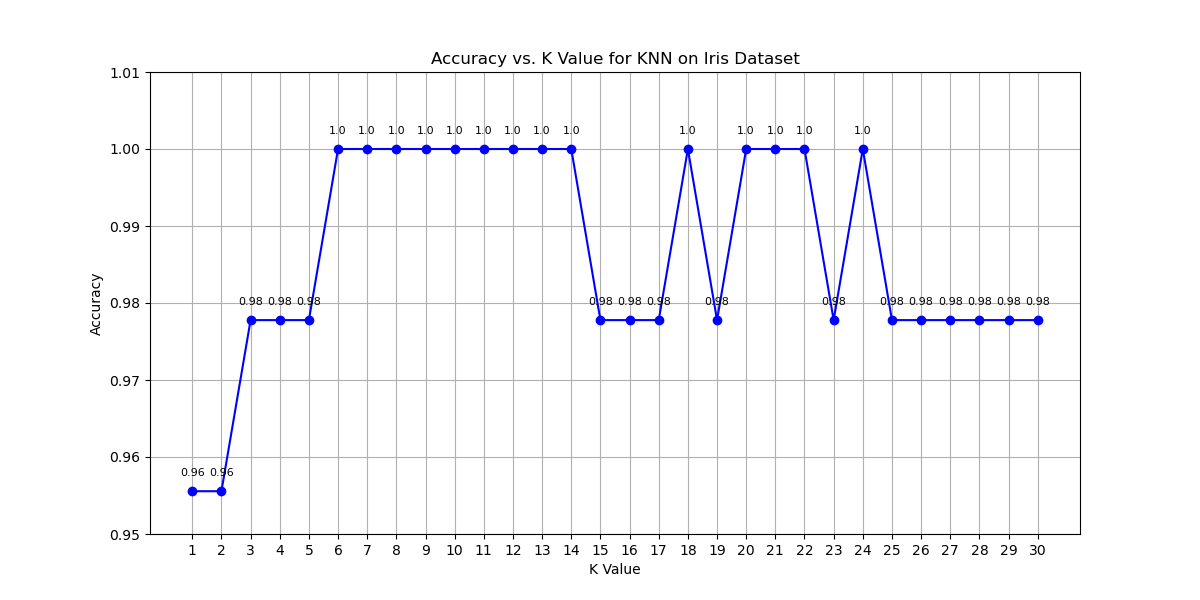

In [17]:
import matplotlib.pyplot as plt

k_values = list(range(1, 31))

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. K Value for KNN on Iris Dataset')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.yticks(np.arange(0.95, 1.01, 0.01))
for i, txt in enumerate(accuracies):
    plt.annotate(round(txt, 2), (k_values[i], accuracies[i] + 0.002), fontsize=8, ha='center')
plt.show()

Let's proceed to the synthetic dataset:

<IPython.core.display.Javascript object>


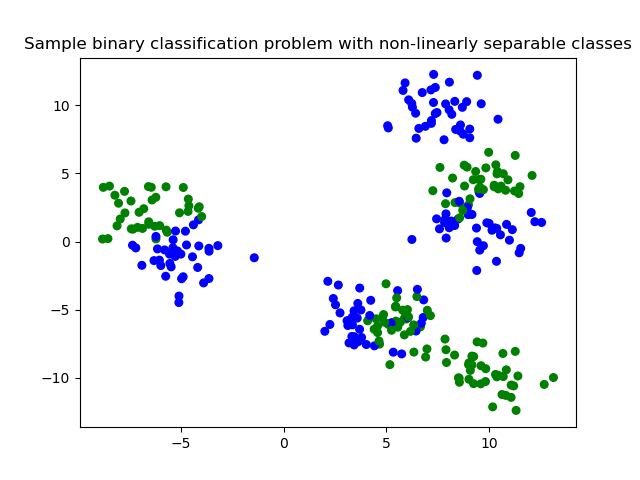

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

First, we'll split into train and test. Then we will apply the regressor, and then visualize the decision boundary:

<IPython.core.display.Javascript object>


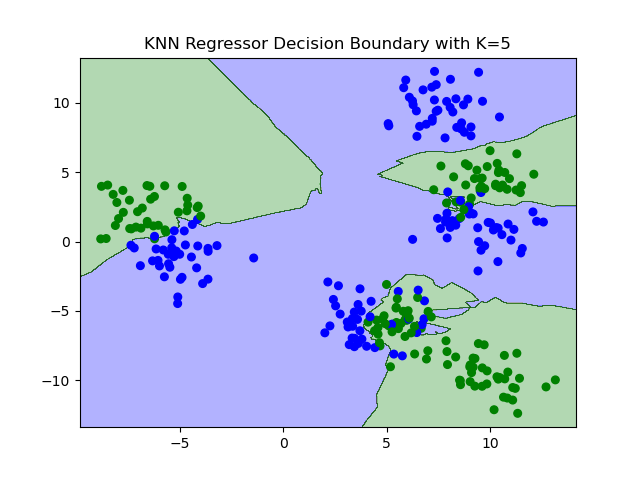

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = range(1, 31)
mse_values = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_D2, y_train_D2)
    y_pred_reg = knn_reg.predict(X_test_D2)
    
    mse = mean_squared_error(y_test_D2, y_pred_reg)
    mse_values.append(mse)

best_k_reg = k_values[mse_values.index(min(mse_values))]

h = .02
x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

knn_best_reg = KNeighborsRegressor(n_neighbors=best_k_reg)
knn_best_reg.fit(X_train_D2, y_train_D2)
Z = knn_best_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_binary = (Z > 0.5).astype(int)  
Z_binary = Z_binary.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z_binary, cmap=cmap_bold, alpha=0.3)
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, cmap=cmap_bold, marker='o', s=30)
plt.title(f"KNN Regressor Decision Boundary with K={best_k_reg}")
plt.show()

Let's test it with k = 18, as it is shown in the example:

In [35]:
k = 18
y_pred_binary = (y_pred_reg_18 > 0.5).astype(int)
accuracy_18_binary = accuracy_score(y_test_D2, y_pred_binary)

print(f"The accuracy for K = {k} using KNN regressor is: {accuracy_18_binary}")

The accuracy for K = 18 using KNN regressor is: 0.8777777777777778


As we can see, the accuracy isn't the highest. Let's find the actual value with the most accuracy:

In [38]:
accuracies = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_D2, y_train_D2)
    y_pred_reg = knn_reg.predict(X_test_D2)
    
    y_pred_binary = (y_pred_reg > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test_D2, y_pred_binary)
    accuracies.append(accuracy)

In [39]:
k_best = k_values[accuracies.index(max(accuracies))]
score_best = max(accuracies)  
print('The best k = {} , accuracy = {}'.format(k_best, score_best))

The best k = 5 , accuracy = 0.9111111111111111
